In [5]:
import pandas as pd

In [6]:
import ast


df = pd.read_csv("gemma_confidence_benchmark_mmlu.csv")
df
# list_from_string = ast.literal_eval(df['log_probs'][0])

# list_from_string

,generated,log_probs,linear_probs,correct_answer
0,"['\n\n\n', 'Answer', ':', ' C', ',', ' Confide...","[-0.7672720551490784, -0.04161849245429039, -0...","[46.42778667927373, 95.92356664187938, 99.8774...",C
1,"['\n\n\n', 'Answer', ':', ' B', ',', ' Confide...","[-0.848608136177063, -0.02669469639658928, -0....","[42.80102495342861, 97.36584575870533, 99.9156...",B
2,"['\n', '<end_of_turn>', '<eos>']","[-1.4381766319274902, -0.4165881872177124, -0....","[23.736015928572247, 65.92923690720227, 95.199...",D
3,"['\n\n\n', 'Answer', ':', ' B', ',', ' Confide...","[-1.3097527027130127, -0.043619897216558456, -...","[26.98867904038364, 95.73177674741244, 99.8935...",C
4,"['<end_of_turn>', '\n', '<eos>']","[-1.3794939517974854, -0.6439965963363647, -0....","[25.170589615247767, 52.518925463196155, 99.64...",B
...,...,...,...,...
995,"['\n', '<end_of_turn>', '\n', '<eos>']","[-1.2152516841888428, -0.5673412084579468, -0....","[29.663534647152545, 56.70310536239265, 63.545...",B
996,"[' ', '\n', '<end_of_turn>', '\n', '<eos>']","[-1.3170626163482666, -0.5707944631576538, -0....","[26.792113441531267, 56.50763279983494, 84.719...",A
997,"['\n', '<end_of_turn>', '\n', '<eos>']","[-1.3929520845413208, -0.4682653248310089, -0....","[24.83410975291648, 62.608738508854124, 68.728...",A
998,"[' ', '\n', '<end_of_turn>', '\n', '<eos>']","[-1.2888734340667725, -0.5344667434692383, -0....","[27.558106852207636, 58.59816854046335, 77.846...",B


In [7]:
correct_answers_list = []
predicted_answer_list = []
logprob_list = []
linear_prob_list = []
llm_confidence_list = []


def find_letter_in_list(lst):
    # Define the letters to search for
    letters_to_find = {'A', 'B', 'C', 'D'}
    
    # Loop through the list with index
    for index, value in enumerate(lst):
        # Check if the value (stripped of spaces) is one of the letters
        if value.strip() in letters_to_find:
            return value.strip(), index  # Return the found letter and its index
    
    # If no matching letter is found, return None
    return None, -1

import re

def extract_confidence(gen_list):
    generated_text = "".join(gen_list)
    
    # Regular expression to match "Confidence: <value>"
    match = re.search(r'Confidence:\s*(\d+(\.\d+)?)', generated_text)
    
    if match:
        confidence_value = match.group(1)
        return confidence_value
    else:
        # print(generated_text)
        return None

# Test case
# print(extract_confidence(['D', ')', ' ', '451', ' degrees', '\n', 'Conf', 'idence', ':', ' ', '0', '.', '9']))

for i, row in df.iterrows():
    # print(i)
    generation = ast.literal_eval(df['generated'][i])
    log_probs = ast.literal_eval(df['log_probs'][i]) 
    correct_answer = df['correct_answer'][i]
    linear_prob = ast.literal_eval(df['linear_probs'][i])

    llm_confidence = extract_confidence(generation)
    predicted_answer = find_letter_in_list(generation)[0]


    if predicted_answer is None or llm_confidence is None:
        # print(generation)
        continue 

    llm_confidence_list.append(float(llm_confidence))

    predicted_answer_list.append(predicted_answer)
    correct_answers_list.append(correct_answer)
    logprob_list.append(log_probs[find_letter_in_list(generation)[1]])
    linear_prob_list.append(linear_prob[find_letter_in_list(generation)[1]])
new_df = pd.DataFrame({
    'correct_answer': correct_answers_list,
    'predicted_answer': predicted_answer_list,
    'logprob': logprob_list,
    'linear_prob': linear_prob_list,
    'confidence': llm_confidence_list
})

new_df

new_df[new_df['confidence'] > 0.7]
import numpy as np
new_df['llm Confidence'] = np.where(new_df['confidence'] > 0.7, 1, 0)

Frequency of Confident Correct Answers: 443
Frequency of Not Confident Correct Answers: 0
Frequency of Confident Incorrect Answers: 75
Frequency of Not Confident Incorrect Answers: 0


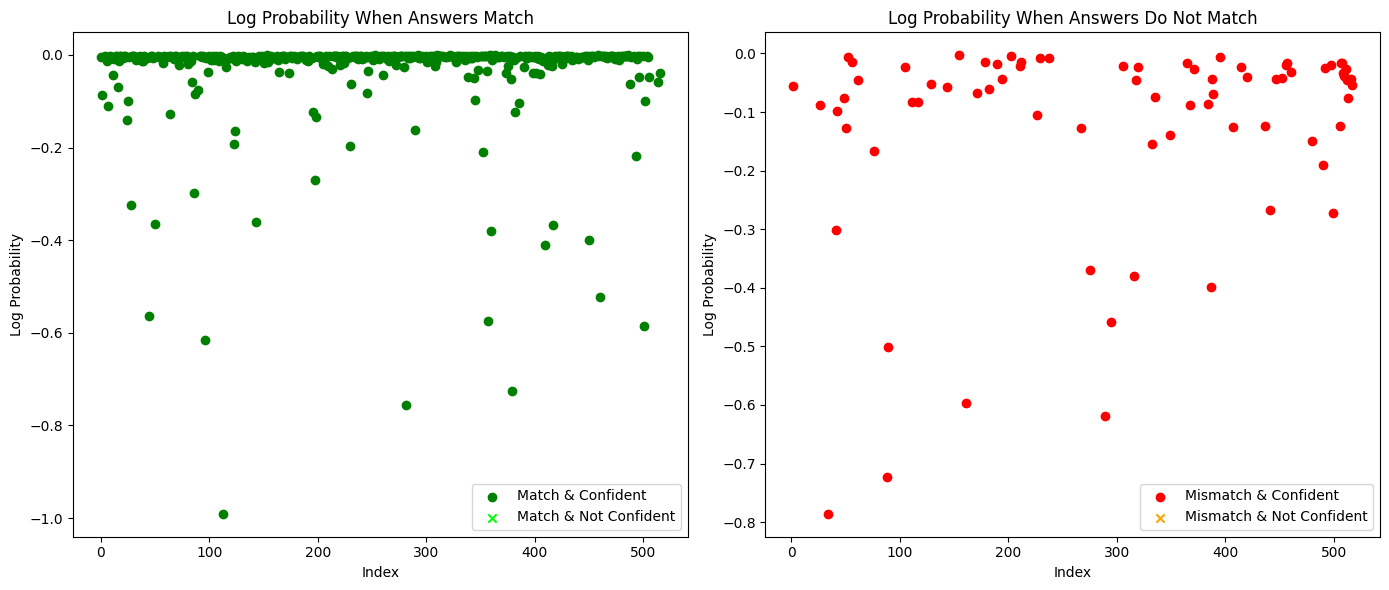

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming new_df is already created with 'correct_answer', 'predicted_answer', 'logprob', and 'llm Confidence' columns

# Filter categories
match_confident = new_df[(new_df['correct_answer'] == new_df['predicted_answer']) & (new_df['llm Confidence'] == 1)]
match_not_confident = new_df[(new_df['correct_answer'] == new_df['predicted_answer']) & (new_df['llm Confidence'] == 0)]
mismatch_confident = new_df[(new_df['correct_answer'] != new_df['predicted_answer']) & (new_df['llm Confidence'] == 1)]
mismatch_not_confident = new_df[(new_df['correct_answer'] != new_df['predicted_answer']) & (new_df['llm Confidence'] == 0)]

# Calculate frequencies
freq_match_confident = len(match_confident)
freq_match_not_confident = len(match_not_confident)
freq_mismatch_confident = len(mismatch_confident)
freq_mismatch_not_confident = len(mismatch_not_confident)

# Print frequencies
print("Frequency of Confident Correct Answers:", freq_match_confident)
print("Frequency of Not Confident Correct Answers:", freq_match_not_confident)
print("Frequency of Confident Incorrect Answers:", freq_mismatch_confident)
print("Frequency of Not Confident Incorrect Answers:", freq_mismatch_not_confident)

# Create scatter plot
plt.figure(figsize=(14, 6))

# Plot when answers match
plt.subplot(1, 2, 1)
plt.scatter(match_confident.index, match_confident['logprob'], color='green', marker='o', label='Match & Confident')
plt.scatter(match_not_confident.index, match_not_confident['logprob'], color='lime', marker='x', label='Match & Not Confident')
plt.xlabel("Index")
plt.ylabel("Log Probability")
plt.title("Log Probability When Answers Match")
plt.legend()

# Plot when answers do not match
plt.subplot(1, 2, 2)
plt.scatter(mismatch_confident.index, mismatch_confident['logprob'], color='red', marker='o', label='Mismatch & Confident')
plt.scatter(mismatch_not_confident.index, mismatch_not_confident['logprob'], color='orange', marker='x', label='Mismatch & Not Confident')
plt.xlabel("Index")
plt.ylabel("Log Probability")
plt.title("Log Probability When Answers Do Not Match")
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


##### Observations

As seen in the results above, LLMs, specifically GPT3.5, are not a reliable source to assess the confidence in its own answer. 

The LLM only categorized five answers as not confident, and claimed high confidence in over 98% of the incorrect answers.

This points us to leverage alternative directions to such as Logprobs to assess a confidence of a model, and flag potentially incorrect responses